# Credit Card Fraud Detection

## Context

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Content

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# Import libraries

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the data
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Verify the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Verify missing values in the data
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Exploratory Data Analysis (EDA)

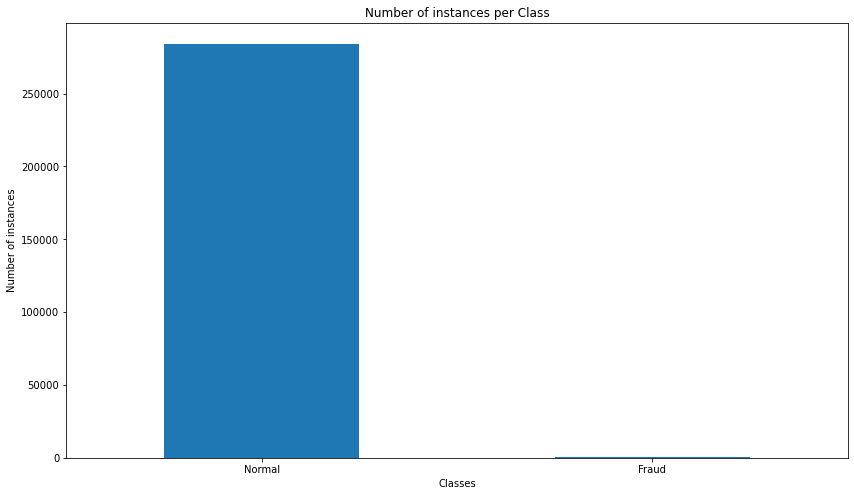

In [13]:
labels =['Normal','Fraud']
plt.figure(figsize=(14,8))
num_classes = pd.value_counts(data['Class'], sort=True)
num_classes.plot(kind='bar',rot=0)
plt.xticks(range(2), labels)
plt.title('Number of instances per Class')
plt.xlabel('Classes')
plt.ylabel('Number of instances')
plt.show()

As you can see, the number of instances for both classes are so unnbalanced, for the Normal class there are 284315 instances, on the other hand, for the Fraud class there are only 492 instances

In [17]:
# Get the number of instances per class
normal = data[data['Class']==0]
fraud = data[data['Class']==1]
print('Shape normal class:', normal.shape)
print('Shape fraud class:', fraud.shape)

Shape normal class: (284315, 31)
Shape fraud class: (492, 31)


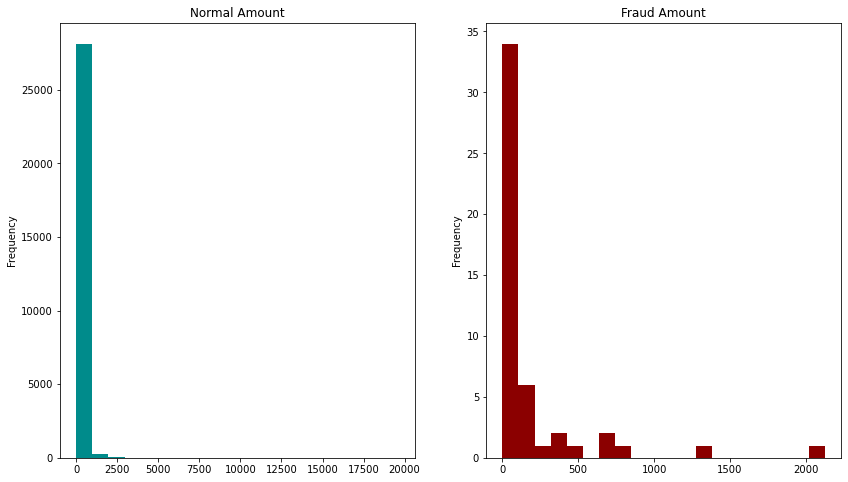

In [108]:
# Verify the amount in each class
plt.figure(figsize=(14,8))
plt.subplot(121)
normal.Amount.plot(kind='hist', title='Normal Amount',color='darkcyan',bins=20)
plt.subplot(122)
fraud.Amount.plot(kind='hist', title='Fraud Amount', color='darkred',bins=20)

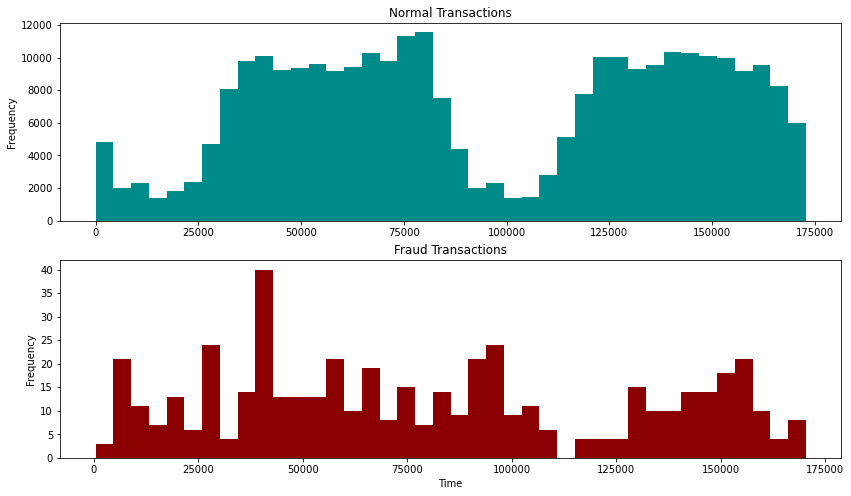

In [29]:
# Number of transactions in each class
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(14,8))
bins=40
# Normal class
normal.Time.plot(kind='hist', title='Normal Transactions', color='darkcyan', ax=ax1,bins=bins)
fraud.Time.plot(kind='hist', title='Fraud Transactions', color='darkred', ax=ax2,bins=bins)

plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

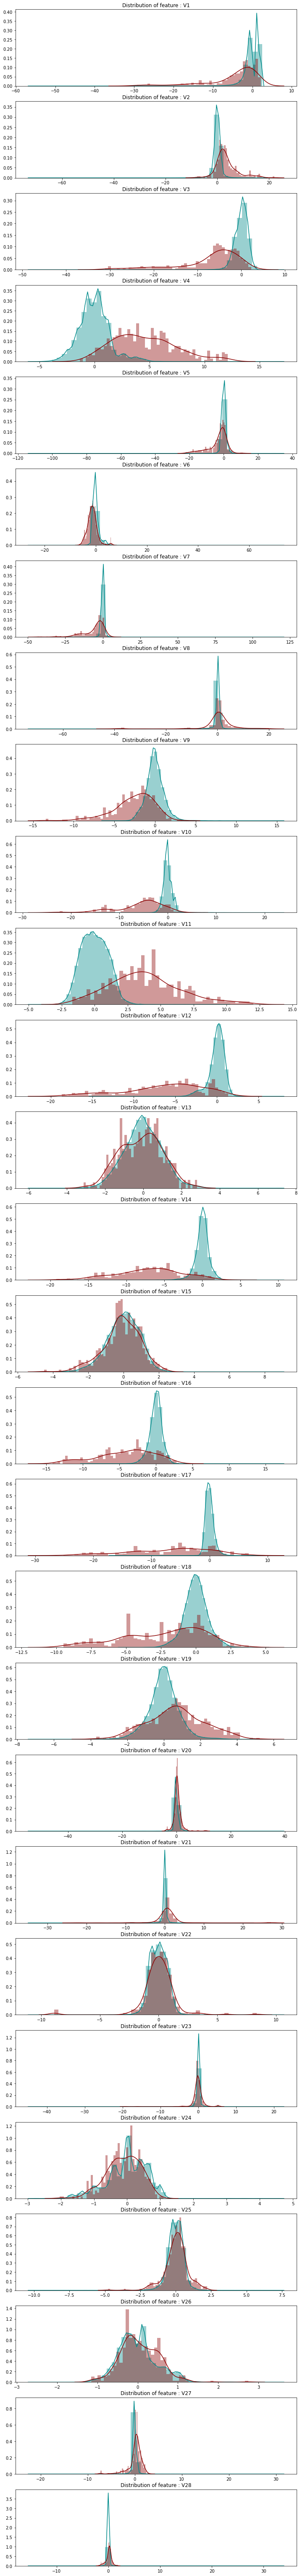

In [42]:
# Now let's plot the distribution plot for the V features
#Select only the anonymized features.
v_features = data.iloc[:,1:29].columns
# Grid Spec
gs = gridspec.GridSpec(28,1)
bins=50
plt.figure(figsize=(12,28*4))
for i, cont in enumerate(data[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[cont][data.Class==0], bins = bins, color='darkcyan')
    sns.distplot(data[cont][data.Class==1], bins = bins, color='darkred')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature : '+ str(cont))
plt.show()

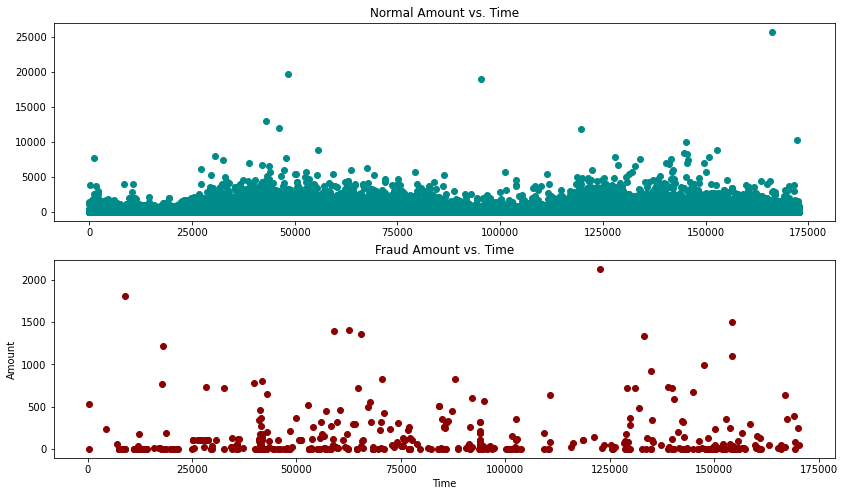

In [28]:
# Plot the time with the amount
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(14,8))
# Normal Class
ax1.scatter(normal.Time, normal.Amount, color='darkcyan')
ax1.set_title('Normal Amount vs. Time')
# Fraud Class
ax2.scatter(fraud.Time, fraud.Amount, color='darkred')
ax2.set_title('Fraud Amount vs. Time')

plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

According to the distribution plots, there are some features with similar distributions for both classes.For example, features such as 'V5','V6','V8','V13','V15','V20','V22','V23','V25','V26','V27','V28' has similar distributions for the normal and fraud class, which means they don't provide really useful information for fraud detection. in order to improve the models performance, I will drop this features.

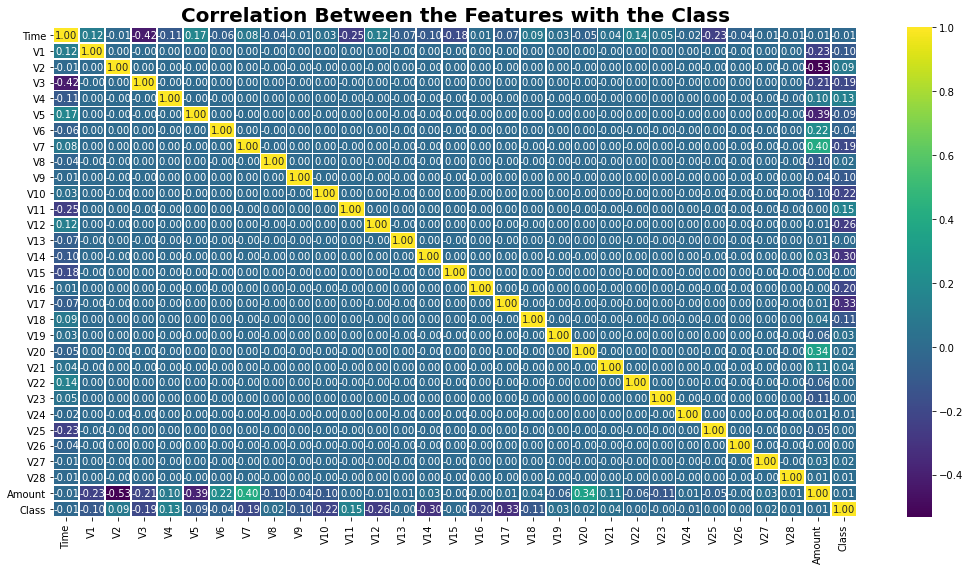

In [49]:
# Plot the correlation between the features with the class
plt.figure(figsize=(18,9))
s = sns.heatmap(data.corr(),annot=True,linewidth='.5', fmt='.2f', cmap=plt.cm.viridis)
plt.title('Correlation Between the Features with the Class', weight='bold', fontsize=20)
plt.show()

In [50]:
# Drop this features with similar distributions
dataf = data.drop(['V5','V6','V8','V13','V15','V20','V22','V23','V25','V26','V27','V28'], axis=1)
dataf.head()

,Time,V1,V2,V3,V4,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,V24,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,0.066928,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,-0.339846,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998,-0.689281,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.108300,-1.175575,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.009431,0.141267,69.99,0


In [71]:
## Take some sample of the data
df= dataf.sample(frac = 0.1,random_state=1)
df.shape
#Determine the number of fraud and valid transactions in the dataset
fraud = df[df['Class']==1]
normal = df[df['Class']==0]
outlier_fraction = len(fraud)/float(len(normal))
# Print the variables
print(outlier_fraction)
print("Fraud Cases : {}".format(len(fraud)))
print("Normal Cases : {}".format(len(normal)))

0.0017234102419808666
Fraud Cases : 49
Normal Cases : 28432


In [73]:
# Define a random state 
state = np.random.RandomState(42)
# Create independent and Dependent Features
x = df.drop(['Class'], axis=1)
y = df['Class']
x_outliers = state.uniform(low=0, high=1, size=(x.shape[0],x.shape[1]))
# Print the shapes of X & Y
print(x.shape)
print(y.shape)

(28481, 18)
(28481,)


In [75]:
# Scale al the features into the same range
scale = StandardScaler()
x = scale.fit_transform(x)

# Data Visualization

In [93]:
#Set df2 equal to all of the fraulent and 10,000 normal transactions.
df2 = data[data.Class == 1]
df2 = pd.concat([df2, data[data.Class == 0].sample(n = 10000)], axis = 0)

#Scale features to improve the training ability of TSNE.
df2_std = scale.fit_transform(df2)

#Set y equal to the target values.
y = df2.iloc[:,-1].values

## TSNE

t-distributed Stochastic Neighbor Embedding.

t-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high. This will suppress some noise and speed up the computation of pairwise distances between samples.

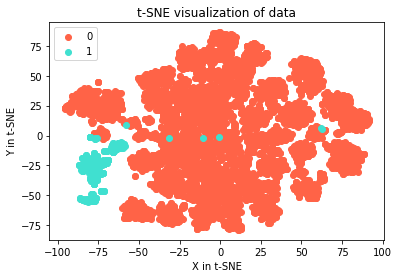

In [107]:
# Using TSNE
tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(df2_std)

#Build the scatter plot with the two types of transactions.
color_map = {0:'tomato', 1:'turquoise'}
plt.figure()
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = x_test_2d[y==cl,0], 
                y = x_test_2d[y==cl,1], 
                c = color_map[idx], 
                label = cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of data')
plt.show()

## PCA

Principal component analysis (PCA).

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

It uses the LAPACK implementation of the full SVD or a randomized truncated SVD by the method of Halko et al. 2009, depending on the shape of the input data and the number of components to extract.

It can also use the scipy.sparse.linalg ARPACK implementation of the truncated SVD.

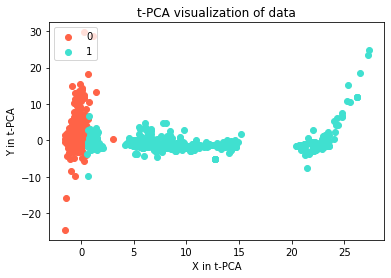

In [105]:
# Using PCA
pca = PCA(n_components=2, random_state=0)
x_test_2d = pca.fit_transform(df2_std)
#Build the scatter plot with the two types of transactions.
color_map = {0:'tomato', 1:'turquoise'}
plt.figure()
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = x_test_2d[y==cl,0], 
                y = x_test_2d[y==cl,1], 
                c = color_map[idx], 
                label = cl)
plt.xlabel('X in t-PCA')
plt.ylabel('Y in t-PCA')
plt.legend(loc='upper left')
plt.title('t-PCA visualization of data')
plt.show()

#  Models Building

In this section I will try different models used to anomaly detection such as:

## Isolation Forest

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

Random partitioning produces noticeable shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

## Local Outlier Factor(LOF)

Unsupervised Outlier Detection using Local Outlier Factor (LOF)

The anomaly score of each sample is called Local Outlier Factor. It measures the local deviation of density of a given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood. More precisely, locality is given by k-nearest neighbors, whose distance is used to estimate the local density. By comparing the local density of a sample to the local densities of its neighbors, one can identify samples that have a substantially lower density than their neighbors. These are considered outliers.

## One Class SVM

Unsupervised Outlier Detection.

Estimate the support of a high-dimensional distribution.

The implementation is based on libsvm.


In [89]:
# Define the models to perform in a dictionary
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(x), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}

In [90]:
# Make the predictions for each model
n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(x)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(x)
        y_pred = clf.predict(x)
    else:    
        clf.fit(x)
        scores_prediction = clf.decision_function(x)
        y_pred = clf.predict(x)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(y,y_pred))
    print("Classification Report :")
    print(classification_report(y,y_pred))

Isolation Forest: 57
Accuracy Score :
0.9979986657771848
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.42      0.43      0.42        49

    accuracy                           1.00     28481
   macro avg       0.71      0.71      0.71     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
Accuracy Score :
0.9965942207085425
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

Support Vector Machine: 1420
Accuracy Score :
0.9501422000632
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.95      

## Conclusions

* Isolation Forest is the model with the best performance, with the highest accuracy
* Isolation Forest detected 57 errors versus Local Outlier Factor detecting 97 errors vs. SVM detecting 1420 errors
* When comparing error precision & recall for the 3 models , the Isolation Forest performed much better than the LOF and SVM with 42 % against 2% (LOF) and 3% (SVM).
* In order to improve the performance of the models you can use:
    * Deep Learning Models to detect more accurately  fraud transictions
    * More complex models of anomaly detection
    * Use more samples of the fraud class, in this case there was a serious imbalance class problem and that is why the models are not the best.